Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



 Finished!	 1  outer loops;	 0  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 3  outer loops;	 4  inner loops
 Finished!	 3  outer loops;	 4  inner loops
 Finished!	 3  outer loops;	 4  inner loops
 Finished!	 3  outer loops;	 4  inner loops
 Finished!	 3  outer loops;	 5  inner loops
 Finished!	 3  outer loops;	 5  inner loops
 Finished!	 3  outer loops;	 5  inner loops
 Finished!	 3  outer loops;	 5  inner loops
 Finished!	 3  outer loops;	 5  inner loops
 Finished!	 3  outer loops;	 5  inner loops
 Finished!	 3  outer loops;	 5  inner loops
 Finished!	 3  outer loops;	 5  inner loops
 Finished!	 3  outer loops;	 5  inner loops
 Finished!	 3  outer loops;	 5  inner loops
 Finished!	 3  outer loops;	 5  inner loops
 Finished!	 3  outer loops;	 6  inner loops
 Finished!	 3  outer loops;	 6  inner loops
 Finished!	 3  outer loops;	 6  inner loops
 Finished!	 3  outer loops;	 6  inner loops
 Finished!	 3  outer loops;	 6  inner loops
 Finished!	 3  outer loops;	 6  

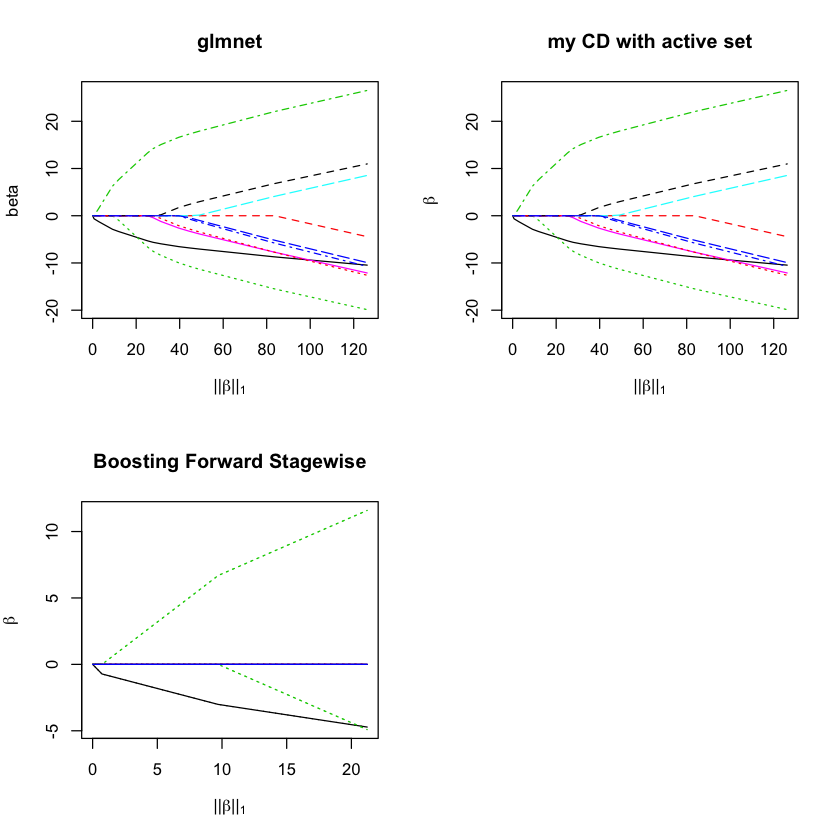

In [1]:
library(glmnet)
rm(list=ls())
source("/Users/canyang/Documents/github_Yang/statistical-learning/Statistical-Machine-Learning/Lasso.R")

# set.seed(10)
ntrain <- 1000
p <- 10
c0 <- 2
xtrain <- 2*matrix(rnorm(ntrain*p),ntrain,p) + c0
xtrain[,1] <- xtrain[,1] * 3

b <- rep(0,p)
b[1:10] <- rnorm(10)

b0 <- 1
ytrain <- xtrain%*%b + b0 + rnorm(ntrain,0,sqrt(var(xtrain%*%b)))#rnorm(ntrain,0,1)
ytrain <- 10*ytrain

# centerize xtrain
cc <- colMeans(xtrain)
xtrain2 <- t(t(xtrain) - cc)

# standardize xtrain?
standardizeX <- T

if(standardizeX){
  s <- sqrt(colMeans(xtrain2^2))
  xtrain2 <- t(t(xtrain2)/s)
}

# get lambda sequence
MaxLam <- max(abs(t(xtrain2)%*%ytrain))
loglam <- seq(log10(MaxLam),log10(0.001*MaxLam),length.out = 100)
# loglam <- seq(2*log10(p^2),-log10(p^2),length.out = 100)
lam <- 10^(loglam)#exp(loglam)

# fit using glmnet
fitglmnet <- glmnet(xtrain,ytrain,alpha=1,lambda = lam/ntrain,standardize = T,thresh = 1e-10)

fitLasso1 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam,method="ACD")
# fitLasso2 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam,method="CD")
# fitLasso3 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam,method="GD")
# fitLasso4 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam,method="AGD")


In [3]:
source("/Users/canyang/Documents/github_Yang/statistical-learning/Statistical-Machine-Learning/linRegFS.R")
fitFS <- linRegFS(xtrain,ytrain,center = T,scale = T, maxIter = 5000)




1 -th iteration;	 updating 1 -th coefficient;	 eps: 0.1234656 ;	 max corr: 0.3602281 
2 -th iteration;	 updating 1 -th coefficient;	 eps: 0.1234656 ;	 max corr: 0.3603696 
3 -th iteration;	 updating 1 -th coefficient;	 eps: 0.1234656 ;	 max corr: 0.360511 
4 -th iteration;	 updating 1 -th coefficient;	 eps: 0.1234656 ;	 max corr: 0.3606523 
5 -th iteration;	 updating 1 -th coefficient;	 eps: 0.1234656 ;	 max corr: 0.3607934 
6 -th iteration;	 updating 1 -th coefficient;	 eps: 0.1234656 ;	 max corr: 0.3609345 
7 -th iteration;	 updating 1 -th coefficient;	 eps: 0.1234656 ;	 max corr: 0.3610753 
8 -th iteration;	 updating 1 -th coefficient;	 eps: 0.1234656 ;	 max corr: 0.3612161 
9 -th iteration;	 updating 1 -th coefficient;	 eps: 0.1234656 ;	 max corr: 0.3613567 
10 -th iteration;	 updating 1 -th coefficient;	 eps: 0.1234656 ;	 max corr: 0.3614972 
11 -th iteration;	 updating 1 -th coefficient;	 eps: 0.1234656 ;	 max corr: 0.3616376 
12 -th iteration;	 updating 1 -th coefficient;	 eps: 

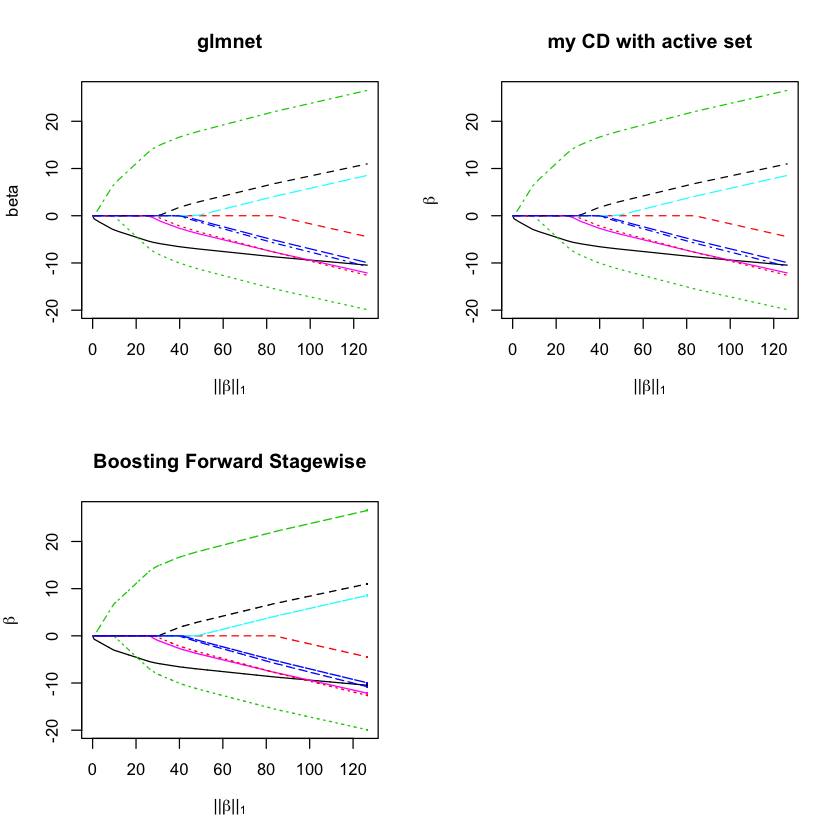

In [4]:
par(mfrow=c(2,2))

matplot(colSums(abs(fitglmnet$beta)),t(fitglmnet$beta),type="l",xlab=expression("||"*beta*"||"[1]),ylab="beta",main="glmnet")
matplot(colSums(abs(fitLasso1$beta)),t(fitLasso1$beta),type="l",xlab=expression("||"*beta*"||"[1]),ylab=expression(beta),main="my CD with active set")
matplot(colSums(abs(fitFS$beta)),t(fitFS$beta),type="l",xlab=expression("||"*beta*"||"[1]),ylab=expression(beta),main="Boosting Forward Stagewise")

